### Data Acquisition

This set has german credit data. It classifies people described by a set of attributes as good or bad credit risks. There are two formats:

- german.data (categorical and numeric values), the original dataset by Prof. Hofmann
- german.data-numeric (all numeric values), by Strathclyde University for algorithms that use numerical attributes

It is also stated that it is worse to class a customer as good when they are bad, than the other way around.

Attributes

Attribute 1:  (qualitative)
Status of existing checking account
           A11 :      ... <    0 DM
           A12 : 0 <= ... <  200 DM
           A13 :      ... >= 200 DM /
           salary assignments for at least 1 year
           A14 : no checking account

Attribute 2:  (numerical)
Duration in month

Attribute 3:  (qualitative)
Credit history
          A30 : no credits taken/
          all credits paid back duly
          A31 : all credits at this bank paid back duly
          A32 : existing credits paid back duly till now
          A33 : delay in paying off in the past
          A34 : critical account/
          other credits existing (not at this bank)

Attribute 4:  (qualitative)
Purpose
          A40 : car (new)
          A41 : car (used)
          A42 : furniture/equipment
          A43 : radio/television
          A44 : domestic appliances
          A45 : repairs
          A46 : education
          A47 : (vacation - does not exist?)
          A48 : retraining
          A49 : business
          A410 : others

Attribute 5:  (numerical)
Credit amount

Attibute 6:  (qualitative)
Savings account/bonds
          A61 :          ... <  100 DM
          A62 :   100 <= ... <  500 DM
          A63 :   500 <= ... < 1000 DM
          A64 :          .. >= 1000 DM
          A65 :   unknown/ no savings account

Attribute 7:  (qualitative)
Present employment since
          A71 : unemployed
          A72 :       ... < 1 year
          A73 : 1  <= ... < 4 years  
          A74 : 4  <= ... < 7 years
          A75 :       .. >= 7 years

Attribute 8:  (numerical)
Installment rate in percentage of disposable income

Attribute 9:  (qualitative)
Personal status and sex
          A91 : male   : divorced/separated
          A92 : female : divorced/separated/married
          A93 : male   : single
          A94 : male   : married/widowed
          A95 : female : single

Attribute 10: (qualitative)
Other debtors / guarantors
          A101 : none
          A102 : co-applicant
          A103 : guarantor

Attribute 11: (numerical)
Present residence since

Attribute 12: (qualitative)
Property
          A121 : real estate
          A122 : if not A121 : building society savings agreement/life insurance
          A123 : if not A121/A122 : car or other, not in attribute 6
          A124 : unknown / no property

Attribute 13: (numerical)
Age in years

Attribute 14: (qualitative)
Other installment plans 
          A141 : bank
          A142 : stores
          A143 : none

Attribute 15: (qualitative)
Housing
          A151 : rent
          A152 : own
          A153 : for free

Attribute 16: (numerical)
Number of existing credits at this bank

Attribute 17: (qualitative)
Job
          A171 : unemployed/ unskilled  - non-resident
          A172 : unskilled - resident
          A173 : skilled employee / official
          A174 : management/ self-employed/
          highly qualified employee/ officer

Attribute 18: (numerical)
Number of people being liable to provide maintenance for

Attribute 19: (qualitative)
Telephone
          A191 : none
          A192 : yes, registered under the customers name

Attribute 20: (qualitative)
foreign worker
          A201 : yes
          A202 : no

### Pre Processing

In [1]:
import pandas as pd

In [2]:
col_names = ["Status of existing checking account",  "Duration in month", 
             "Credit history", "Purpose", "Credit amount", "Savings account/bonds", "Present employment since", 
             "Installment rate in percentage of disposable income", "Personal status and sex", "Other debtors / guarantors", 
             "Present residence since", "Property", "Age in years", "Other installment plans", 
             "Housing", "Number of existing credits at this bank", "Job", "Number of people being liable to provide maintenance for",
             "Telephone", "foreign worker", "credit_risk"]

In [3]:
df = pd.read_csv("german.csv", delimiter=' ', names = col_names)

In [4]:
df.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,credit_risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


Convert all categorical data points into something more human-understandable

In [5]:
df['Status of existing checking account'].replace({'A11' : '... < 0 DM',
                                                   'A12' : '0 <= ... < 200 DM',
                                                   'A13' : '... >= 200 DM / salary assignments for at least 1 year',
                                                   'A14' : 'no checking account'}, inplace = True)

In [6]:
df['Credit history'].replace({'A30' : 'no credits taken/all credits paid back duly', 
                              'A31' : 'all credits at this bank paid back duly', 
                              'A32' : 'existing credits paid back duly till now', 
                              'A33' : 'delay in paying off in the past',
                              'A34' : 'critical account/other credits existing (not at this bank)'}, inplace = True)

In [7]:
df['Purpose'].replace({'A40' : 'car (new)',
                                     'A41' : 'car (used)',
                                     'A42' : 'furniture/equipment',
                                     'A43' : 'radio/television',
                                     'A44' : 'domestic appliances',
                                     'A45' : 'repairs',
                                     'A46' : 'education',
                                     'A47' : '(vacation - does not exist?)',
                                     'A48' : 'retraining',
                                     'A49' : 'business',
                                     'A410' : 'others'}, inplace = True)

In [8]:
df['Savings account/bonds'].replace({'A61' : '... <  100 DM',
                       'A62' : '100 <= ... <  500 DM',
                       'A63' : '500 <= ... < 1000 DM',
                       'A64' : '... >= 1000 DM',
                       'A65' : 'unknown/ no savings account'}, inplace = True)

In [9]:
df['Present employment since'].replace({'A71' : 'unemployed',
                                        'A72' : '... < 1 year',
                                        'A73' : '1  <= ... < 4 years',  
                                        'A74' : '4  <= ... < 7 years',
                                        'A75' : '... >= 7 years'}, inplace = True)

In [10]:
df['Personal status and sex'].replace({'A91' : 'male   : divorced/separated',
                                       'A92' : 'female : divorced/separated/married',
                                       'A93' : 'male   : single',
                                       'A94' : 'male   : married/widowed',
                                       'A95' : 'female : single'}, inplace = True)

In [11]:
df['Other debtors / guarantors'].replace({'A101' : 'none',
                                          'A102' : 'co-applicant',
                                          'A103' : 'guarantor'}, inplace = True)

In [12]:
df['Property'].replace({'A121' : 'real estate',
                        'A122' : 'building society savings agreement/life insurance',
                        'A123' : 'car or other, not in attribute 6',
                        'A124' : 'unknown / no property'}, inplace = True)

In [13]:
df['Other installment plans'].replace({'A141' : 'bank',
                                       'A142' : 'stores',
                                       'A143' : 'none'}, inplace = True)

In [14]:
df['Housing'].replace({'A151' : 'rent',
                       'A152' : 'own',
                       'A153' : 'for free'}, inplace = True)

In [15]:
df['Job'].replace({'A171' : 'unemployed/ unskilled  - non-resident',
                   'A172' : 'unskilled - resident',
                   'A173' : 'skilled employee / official',
                   'A174' : 'management/ self-employed/highly qualified employee/ officer'}, inplace = True)

In [16]:
df['Telephone'].replace({'A191' : 'none',
                         'A192' : 'yes, registered under the customers name'}, inplace = True)

In [17]:
df['foreign worker'].replace({'A201' : 'yes',
                              'A202' : 'no'}, inplace = True)

Save changes to csv file (german_processed.csv)

In [18]:
df.to_csv('german_processed.csv', index = False)

### Data Analysis

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc = {'figure.figsize':(10,6)})
sns.set_theme(style="whitegrid")
sns.set_theme(font_scale = 1.5)

Let's look at the overview of the data

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status of existing checking account                       1000 non-null   object
 1   Duration in month                                         1000 non-null   int64 
 2   Credit history                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit amount                                             1000 non-null   int64 
 5   Savings account/bonds                                     1000 non-null   object
 6   Present employment since                                  1000 non-null   object
 7   Installment rate in percentage of disposable income       1000 non-null   int64 
 8   Personal status and sex      

All of the features are non-null meaning that there are no missing values in entire dataset.

Let's see the summary statistics of our numerical attributes in the dataset

In [22]:
df.describe()

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,credit_risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


As we can see our colummn names are too big and are not precise to access easily, following the Python naming convention
PEP8 let's rename the columns accordingly.

In [23]:
col_names = ['account_status','duration(months)','credit_history','purpose',
                   'credit_amount','savings_account_or_bounds','employed_since',
                   'installment_rate','sex_marital','debtors_or_guarantor','residence_since',
                   'property','age','other_installment_plans','housing',
                   'number_of_existing_cr','job','number_of_ppl_liable','telephone',
                   'foreign_workers','credit_risk']

In [24]:
df.columns = col_names

In [25]:
df.head()

,account_status,duration(months),credit_history,purpose,credit_amount,savings_account_or_bounds,employed_since,installment_rate,sex_marital,debtors_or_guarantor,...,property,age,other_installment_plans,housing,number_of_existing_cr,job,number_of_ppl_liable,telephone,foreign_workers,credit_risk
0,... < 0 DM,6,critical account/other credits existing (not a...,radio/television,1169,unknown/ no savings account,... >= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,1
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,2
2,no checking account,12,critical account/other credits existing (not a...,education,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,1
3,... < 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,...,building society savings agreement/life insurance,45,none,for free,1,skilled employee / official,2,none,yes,1
4,... < 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,2


##### Target Class

In [26]:
df["credit_risk"].value_counts()

1    700
2    300
Name: credit_risk, dtype: int64

Credit risk is the target class here that has 2 outcomes: <b>1</b> represents Good whereas <b>2</b> represents Bad credit risks,

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='credit_risk', ylabel='count'>

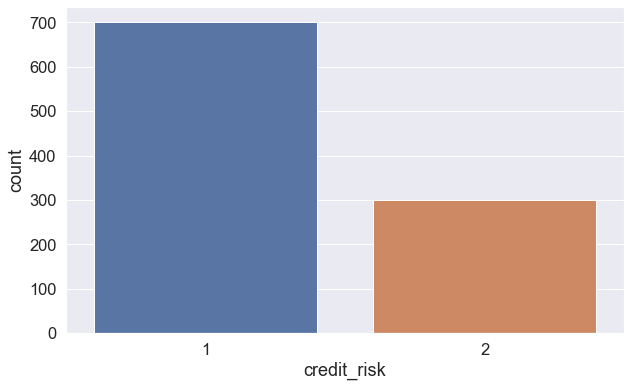

In [27]:
sns.countplot(df["credit_risk"], )

Let's change these outcome values to (0, 1) as a usual convention.

In [28]:
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()
label_encode.fit(df["credit_risk"])
df["credit_risk"] = label_encode.transform(df["credit_risk"])

In [29]:
df["credit_risk"].value_counts()

0    700
1    300
Name: credit_risk, dtype: int64

Here, <b>0</b> represents Good whereas <b>1</b> represents Bad Credit risks.

#### 1. Univariate Analysis

<AxesSubplot:xlabel='count', ylabel='account_status'>

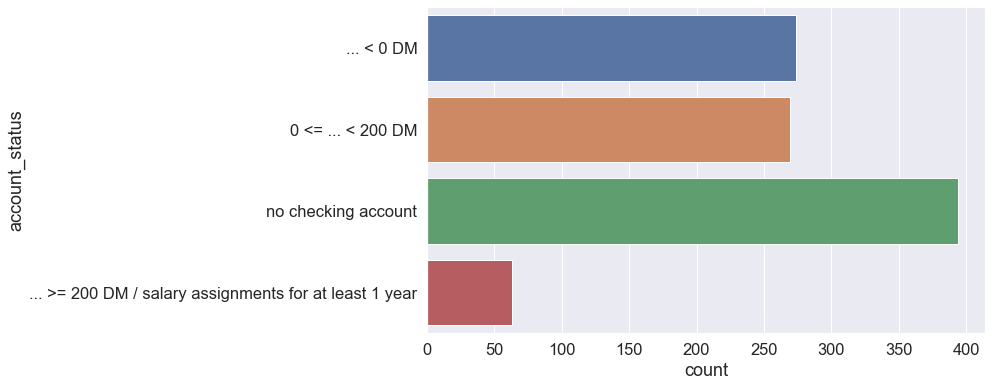

In [30]:
sns.countplot(y = df["account_status"])

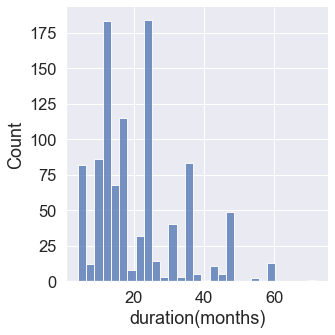

In [31]:
sns.displot(df, x = "duration(months)")

<AxesSubplot:xlabel='count', ylabel='credit_history'>

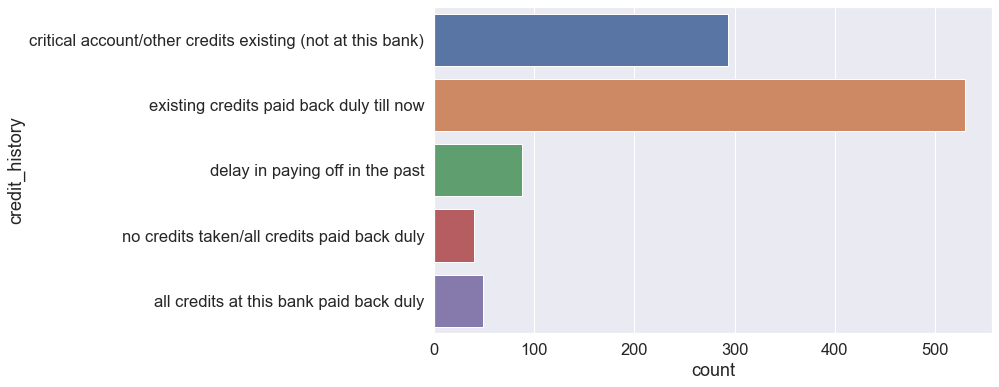

In [32]:
sns.countplot(y = df["credit_history"])

Majority of the customers have existing credits paid back duly till now.

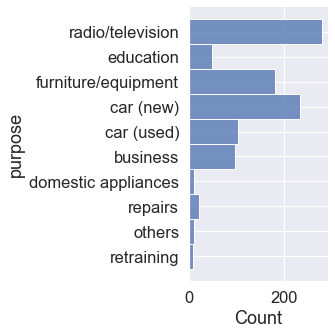

In [33]:
sns.displot(y = df["purpose"])

The most important reason to get credits is to buy radio or television. While if we combine used and new car, then, it will be the most important reason for that purpose.

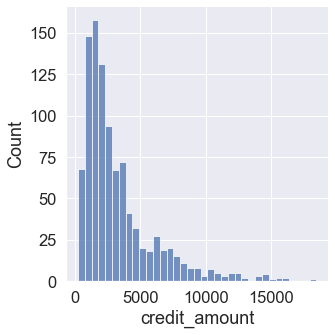

In [34]:
sns.displot(df["credit_amount"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='credit_amount'>

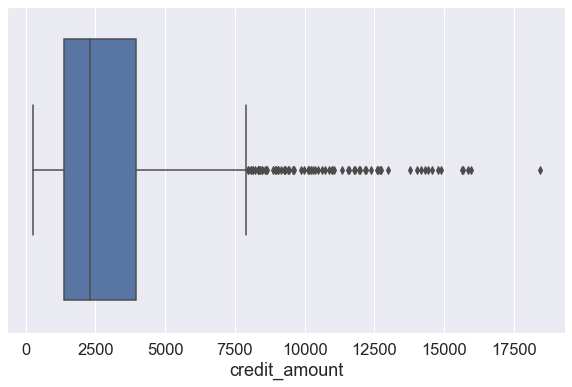

In [35]:
sns.boxplot(df["credit_amount"])

The values of credit_amount lies in interval (300, 8000), all other values are noise and outliers.

<AxesSubplot:xlabel='count', ylabel='savings_account_or_bounds'>

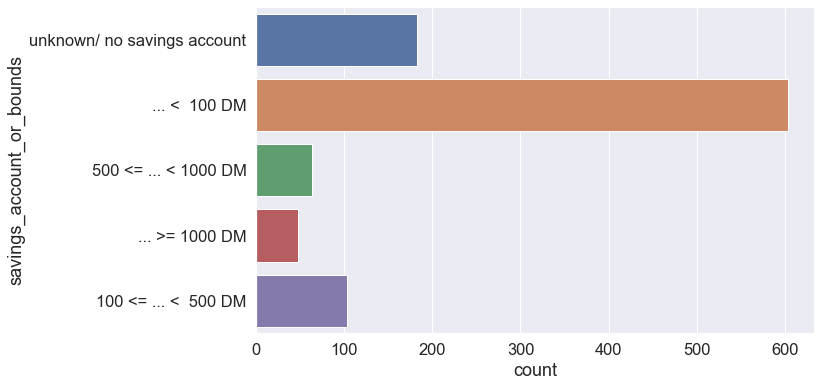

In [36]:
sns.countplot(y = df["savings_account_or_bounds"])

Class Imbalance, we will look at precision instead of just Accuracy to get to know how well our model performed.

<AxesSubplot:xlabel='count', ylabel='employed_since'>

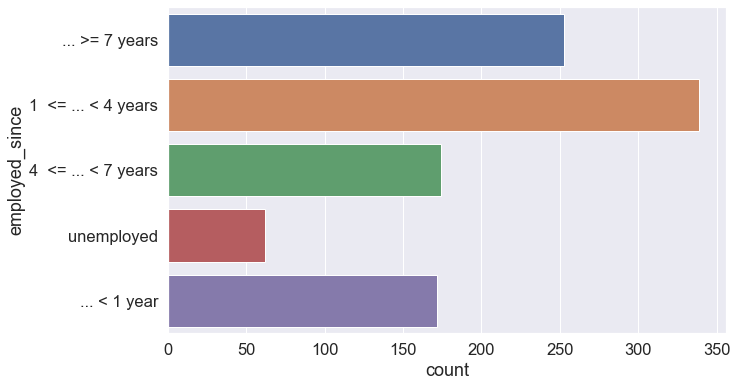

In [37]:
sns.countplot(y = df["employed_since"])

Majority of the customers in this dataset are working and are senior in terms of level.

In [38]:
df["installment_rate"].dtype

dtype('int64')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='installment_rate'>

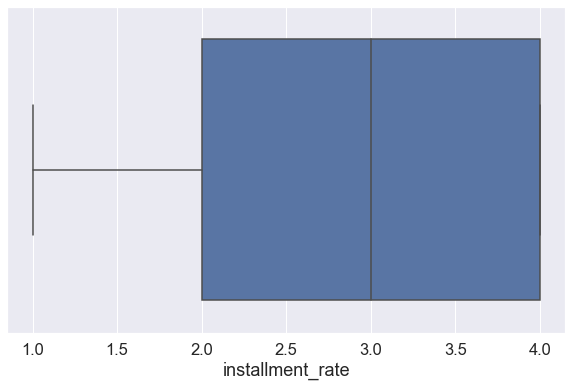

In [39]:
sns.boxplot(df["installment_rate"])

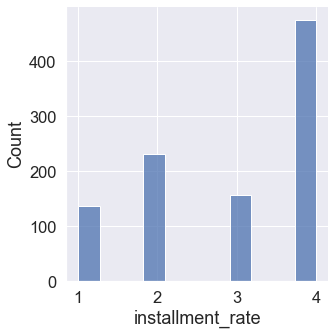

In [40]:
sns.displot(df["installment_rate"])

There are no outliers, and installment_rate is well balanced feature.

<AxesSubplot:xlabel='count', ylabel='sex_marital'>

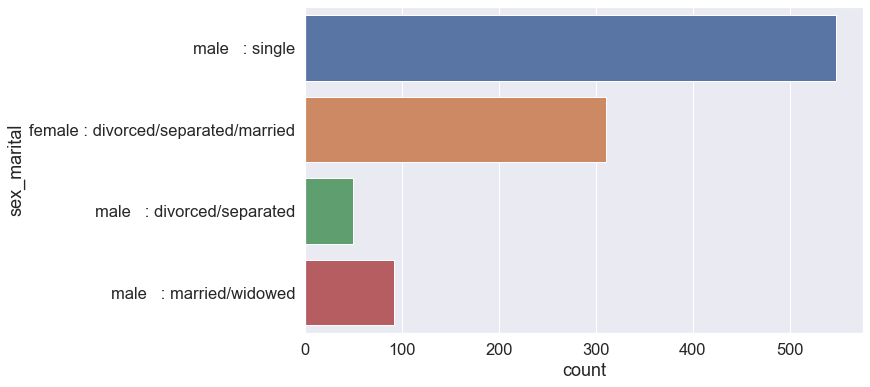

In [41]:
sns.countplot(y = df["sex_marital"])

Majority of the customer's are single men who applied for credits. This can lead to baisness.

In [42]:
df["debtors_or_guarantor"].dtype

dtype('O')

<AxesSubplot:xlabel='count', ylabel='debtors_or_guarantor'>

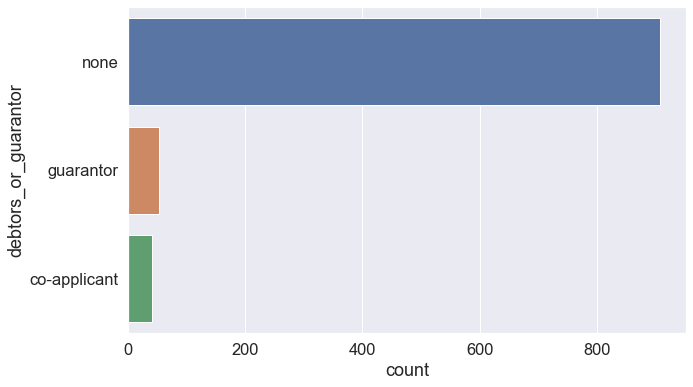

In [43]:
sns.countplot(y = df["debtors_or_guarantor"])

Majority of the customer who applied don't have other debters or guarantors. Model may be biased towards single class here.

In [44]:
df["residence_since"].value_counts()

4    413
2    308
3    149
1    130
Name: residence_since, dtype: int64

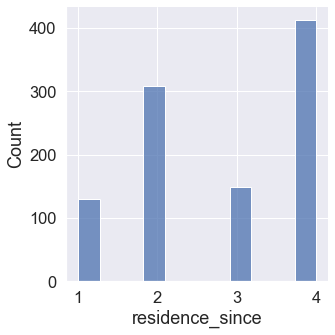

In [45]:
sns.displot(df["residence_since"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='residence_since'>

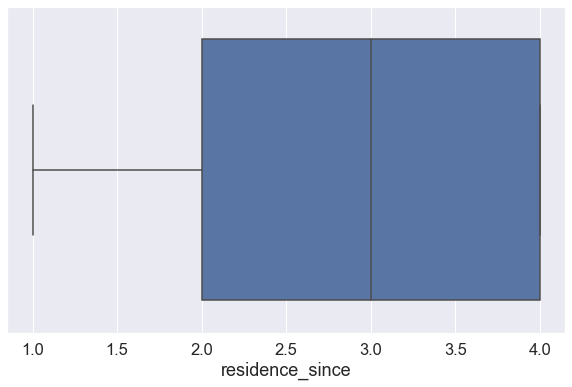

In [46]:
sns.boxplot(df["residence_since"])

All customer's lived more than 1 year while applying for credits.

In [47]:
df["property"].dtype

dtype('O')

<AxesSubplot:xlabel='count', ylabel='property'>

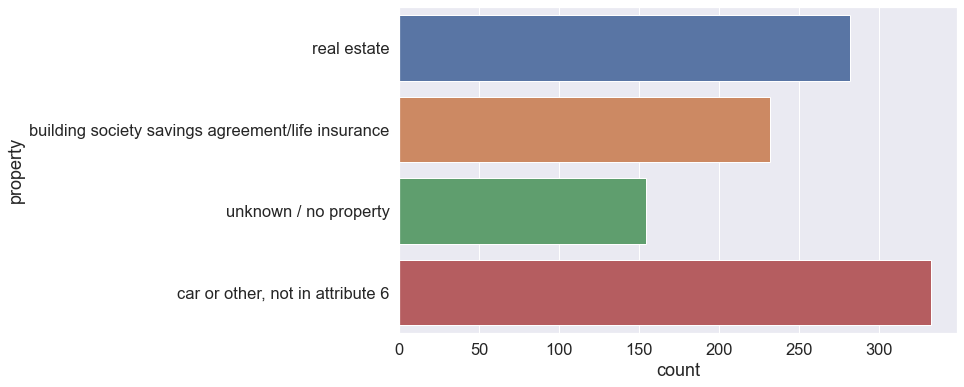

In [48]:
sns.countplot(y = df["property"])

Most of the customers have car, real estate business or other property.

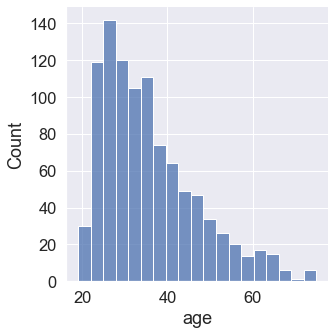

In [49]:
sns.displot(df["age"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

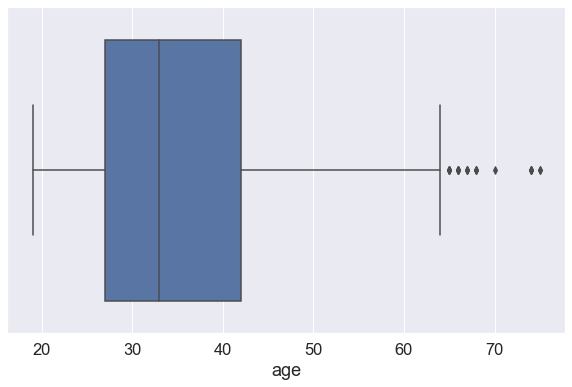

In [50]:
sns.boxplot(df["age"])

Majority of the applicants of getting credits are 18 to 64 year old.

In [51]:
df.columns

Index(['account_status', 'duration(months)', 'credit_history', 'purpose',
       'credit_amount', 'savings_account_or_bounds', 'employed_since',
       'installment_rate', 'sex_marital', 'debtors_or_guarantor',
       'residence_since', 'property', 'age', 'other_installment_plans',
       'housing', 'number_of_existing_cr', 'job', 'number_of_ppl_liable',
       'telephone', 'foreign_workers', 'credit_risk'],
      dtype='object')

In [52]:
df["other_installment_plans"].dtype

dtype('O')

<AxesSubplot:xlabel='other_installment_plans', ylabel='count'>

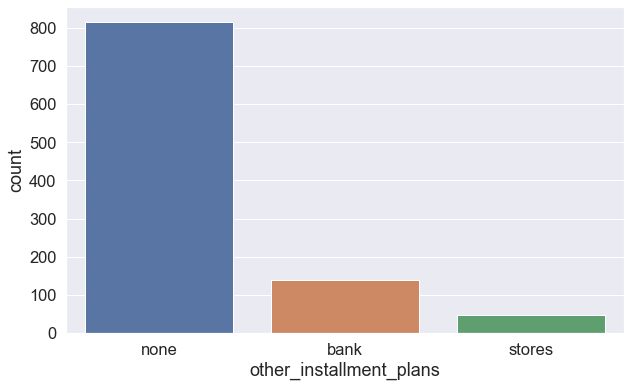

In [53]:
sns.countplot(x = df["other_installment_plans"])

Most of the customer's don't have other installment plans to payback loan.

In [54]:
df.columns

Index(['account_status', 'duration(months)', 'credit_history', 'purpose',
       'credit_amount', 'savings_account_or_bounds', 'employed_since',
       'installment_rate', 'sex_marital', 'debtors_or_guarantor',
       'residence_since', 'property', 'age', 'other_installment_plans',
       'housing', 'number_of_existing_cr', 'job', 'number_of_ppl_liable',
       'telephone', 'foreign_workers', 'credit_risk'],
      dtype='object')

In [55]:
df["housing"].dtype

dtype('O')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='housing', ylabel='count'>

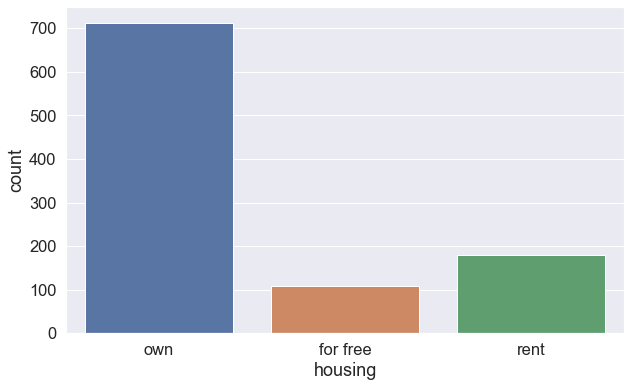

In [56]:
sns.countplot(df["housing"])

Majority of the credits applicants have their own house.

In [57]:
df["number_of_existing_cr"].dtype

dtype('int64')

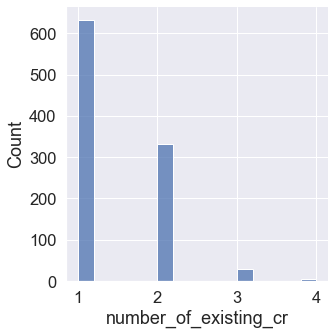

In [58]:
sns.displot(df["number_of_existing_cr"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='number_of_existing_cr'>

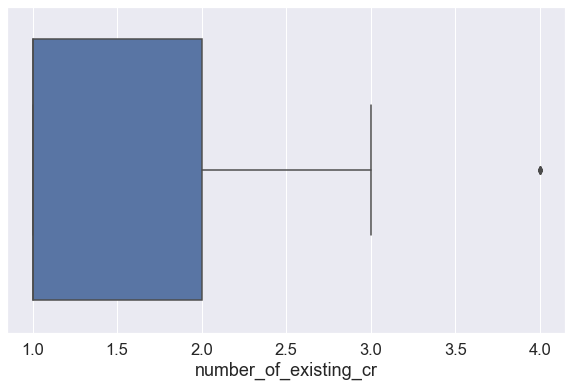

In [59]:
sns.boxplot(df["number_of_existing_cr"])

65% of the customer's already have taken 1.0 credtis. While 35% of customer have taken 2.0 credits.

In [60]:
df["job"].value_counts()

skilled employee / official                                     630
unskilled - resident                                            200
management/ self-employed/highly qualified employee/ officer    148
unemployed/ unskilled  - non-resident                            22
Name: job, dtype: int64

<AxesSubplot:xlabel='count', ylabel='job'>

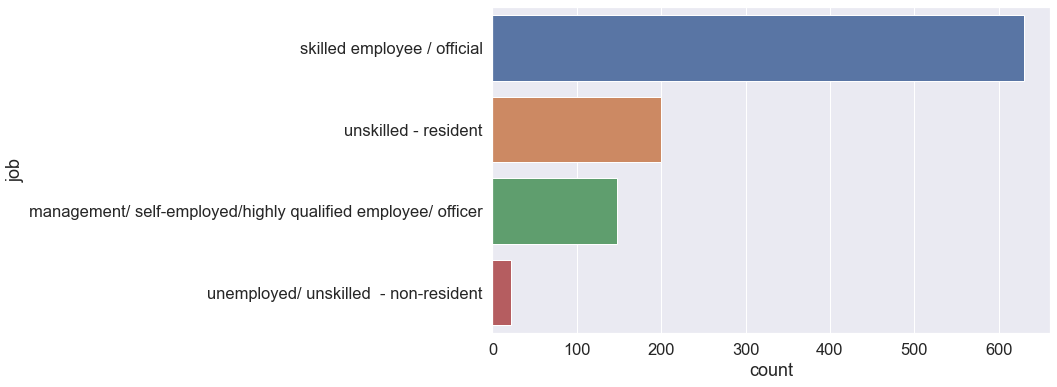

In [61]:
sns.countplot(y = df["job"])

65% of the customer's are skilled workers.

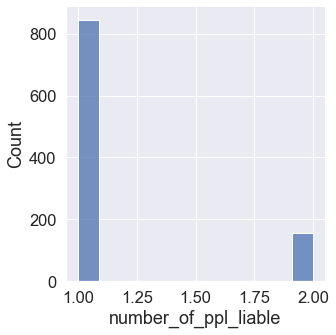

In [62]:
sns.displot(df["number_of_ppl_liable"])

85% of the customer's are liable to provide maintenance for 1.0 credits.

In [63]:
df["telephone"].dtype

dtype('O')

<AxesSubplot:xlabel='count', ylabel='telephone'>

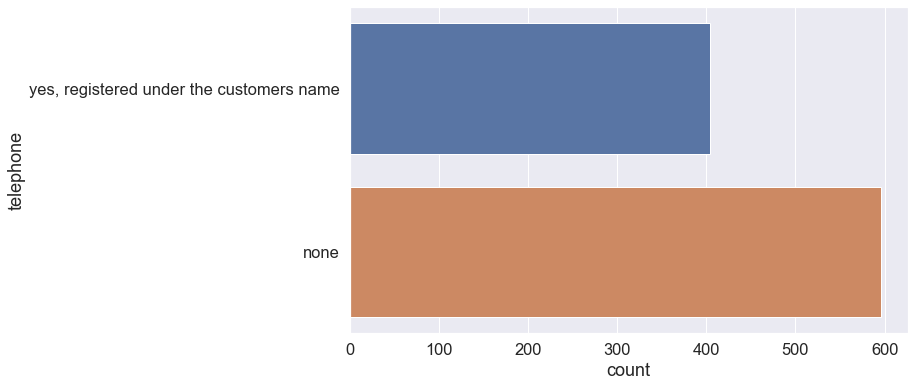

In [64]:
sns.countplot(y = df["telephone"])

Just 40% customer's have their telephones registered under their name. While others don't have registration of their telephone.

In [65]:
df.columns

Index(['account_status', 'duration(months)', 'credit_history', 'purpose',
       'credit_amount', 'savings_account_or_bounds', 'employed_since',
       'installment_rate', 'sex_marital', 'debtors_or_guarantor',
       'residence_since', 'property', 'age', 'other_installment_plans',
       'housing', 'number_of_existing_cr', 'job', 'number_of_ppl_liable',
       'telephone', 'foreign_workers', 'credit_risk'],
      dtype='object')

In [66]:
df["foreign_workers"].dtype

dtype('O')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='foreign_workers', ylabel='count'>

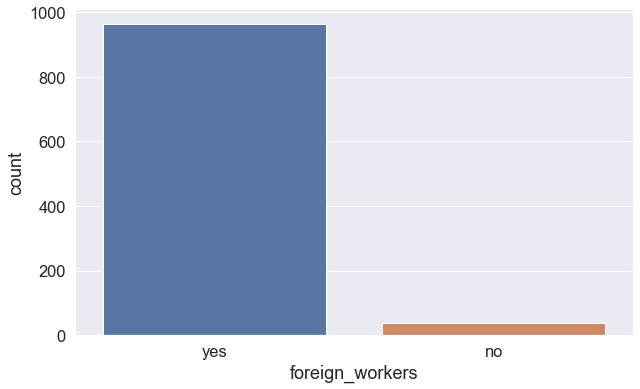

In [67]:
sns.countplot(df["foreign_workers"])

95% of the loan applicants are foreign workers.

### 2. Bivariate Analysis

#### (i) Correlation (for numerical features)

In [68]:
corr = df.corr()

<AxesSubplot:>

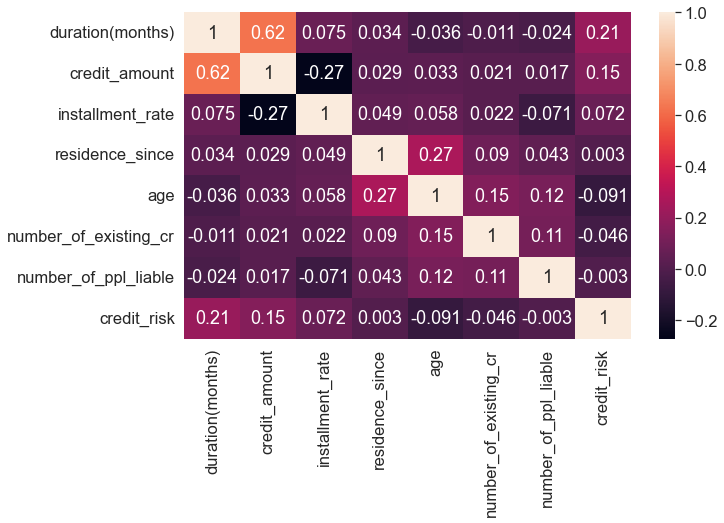

In [69]:
sns.heatmap(corr, annot = True)     #annot = True to show values

The value of r ranges between -1 and 1. A correlation of -1 shows a perfect negative correlation, while a correlation of 1 shows a perfect positive correlation. A correlation of 0 shows no relationship between the movement of the two variables.

#### (ii) Chi-square test (for categorical attributes)

In [70]:
from scipy.stats import chi2_contingency
from pandas.api.types import is_string_dtype

In [71]:
significance_level = 0.05

In [72]:
for column in df:
    if is_string_dtype(df[column]):
        info = pd.crosstab(df["credit_risk"], df[column])
        stat, p, dof, _= chi2_contingency(info.values)
        if p <= significance_level: 
            print(f"Reject NULL HYPOTHESIS, {column} is Significant!") 
        else: 
            print(f"Reject NULL HYPOTHESIS, {column} is Not significant!") 

Reject NULL HYPOTHESIS, account_status is Significant!
Reject NULL HYPOTHESIS, credit_history is Significant!
Reject NULL HYPOTHESIS, purpose is Significant!
Reject NULL HYPOTHESIS, savings_account_or_bounds is Significant!
Reject NULL HYPOTHESIS, employed_since is Significant!
Reject NULL HYPOTHESIS, sex_marital is Significant!
Reject NULL HYPOTHESIS, debtors_or_guarantor is Significant!
Reject NULL HYPOTHESIS, property is Significant!
Reject NULL HYPOTHESIS, other_installment_plans is Significant!
Reject NULL HYPOTHESIS, housing is Significant!
Reject NULL HYPOTHESIS, job is Not significant!
Reject NULL HYPOTHESIS, telephone is Not significant!
Reject NULL HYPOTHESIS, foreign_workers is Significant!


#### (iii) Pincipal Component Analysis

In [73]:
from pandas.api.types import is_int64_dtype

In [74]:
int_cols = []
for column in df:
    if is_int64_dtype(df[column]):
        int_cols.append(column)

In [75]:
int_cols

['duration(months)',
 'credit_amount',
 'installment_rate',
 'residence_since',
 'age',
 'number_of_existing_cr',
 'number_of_ppl_liable',
 'credit_risk']

In [76]:
from sklearn.preprocessing import StandardScaler
x = df.loc[:, int_cols].values
# Separating out the target
y = df.loc[:,'credit_risk'].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [77]:
from sklearn.decomposition import PCA
pca = PCA()

In [78]:
pca = pca.fit(x)
values = pca.explained_variance_ratio_

Text(0.5, 1.0, 'Principal Component Analysis for Feature Selection')

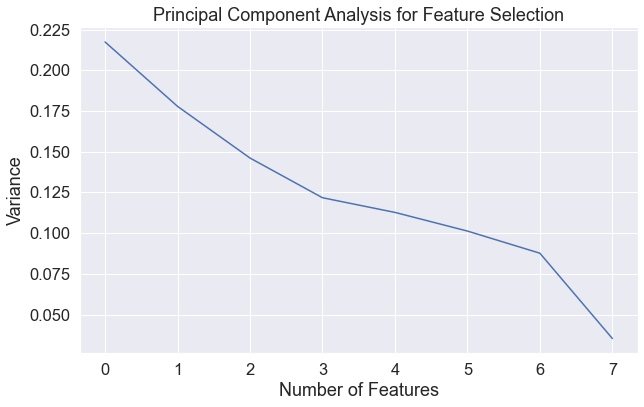

In [79]:
sns.lineplot(x = range(len(values)), y = values)
plt.xlabel("Number of Features")
plt.ylabel("Variance")
plt.title("Principal Component Analysis for Feature Selection")

The more features we use in our possible feature space, the better result we can expect. All features are significance. variance_explained ration is reduced at the end.

What can you say about the features?

In the dataset many attributes are listed such as money in savings account, credit hisotry, employment status, information about personal status and sex, housing, and many more.
Also information about the credit itself is listed such as credit amount, purpose, duration, other debitors.

What are the proportions of applicants belonging to a certain feature?

- Personal information: Age in years, Telephone, Personal status and sex,
- Credit information: Status of existing checking account, Duration in months, Purpose, Credit amount, Savings account/bonds, Installment rate in percentage of disposable income, other debtors/guarantors,  other installment plans, number of existing credits at this bank
- Housing information: Present residence since, Property, Housing, Number of people being liable to provide maintaince for
- Job information: Present employment since, Job, foreign worker

Who is considered to have a good or bad credit risk?

Some attributes are pretty much neutral. But some do show indications on the person having good or bad credit.
- Good credit: higher amount in checking and savings account, all credits paid back duly, employed for many years, guarantor, low number of people being liable to provide maintaince for.
- Bad credit: no or very low amount in checking and savings account, delayed credit pay backs, unemployed, no other debtors or guarantors, high number of people being liable to provide maintaince for